In [192]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras import models
from keras import layers
from keras.datasets import cifar10
import random

In [193]:
random.seed(1)

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [194]:
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(50000, 32, 32, 3)
y_train_shape(50000, 1)
x_test_shape(10000, 32, 32, 3)
y_test_shape(10000, 1)


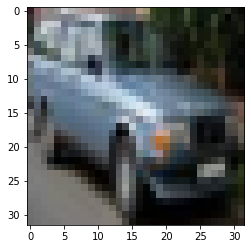

In [195]:
from matplotlib import pyplot
pyplot.imshow(x_train[201,:,:])

In [196]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

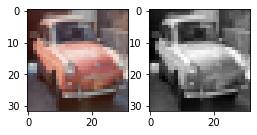

In [197]:
import matplotlib.pyplot as plt

def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

# now we have only one channel in the images
img_channels = 1

# plot a randomly chosen image
img = 64
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(x_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(x_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [198]:
print("x_train_shape"+str(x_train_gray.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test_gray.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(50000, 32, 32, 1)
y_train_shape(50000, 1)
x_test_shape(10000, 32, 32, 1)
y_test_shape(10000, 1)


In [199]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [200]:
#step 2 Build Models
#blank model
nn = models.Sequential()

In [201]:
#add layer1
nn.add(layers.Dense(512,activation="relu",input_shape =(32*32,)))
#add layer2
nn.add(layers.Dense(256,activation="tanh"))
#add layer3
nn.add(layers.Dense(128,activation="relu"))
#add layer4
nn.add(layers.Dense(10,activation = "softmax"))

In [202]:
x_test_gray.shape

(10000, 32, 32, 1)

In [203]:
#step 3 preprocessing 
gx_train = x_train_gray.reshape((50000, 32*32))
gx_test = x_test_gray.reshape((10000, 32*32))

In [204]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(50000, 10)

In [205]:
print("x_train_shape"+str(gx_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(gx_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(50000, 1024)
y_train_shape(50000, 10)
x_test_shape(10000, 1024)
y_test_shape(10000, 10)


In [206]:
#step 4 compile
nn.compile(optimizer="adam",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])

In [207]:
nn.fit(gx_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 2.0248 - accuracy: 0.2652
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8631 - accuracy: 0.3306
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8001 - accuracy: 0.3548
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7504 - accuracy: 0.3752
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7121 - accuracy: 0.3891
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6792 - accuracy: 0.3987
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6466 - accuracy: 0.4137
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6193 - accuracy: 0.4218
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 1.5924 - accuracy: 0.4347
Epoch 10/10
391/391 [==============================] - 2s 5ms/step - loss: 1.5643 - accuracy: 0.4430

In [208]:
test_loss,test_accuracy = nn.evaluate(gx_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.6302 - accuracy: 0.4207


In [209]:
test_accuracy

0.4207000136375427